In [1]:
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

import numpy as np

from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import matplotlib.pyplot as plt
import seaborn as sns
import shap
shap.initjs()

In [4]:
ordinal = pd.read_csv('../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 81)

In [5]:
ordinal = ordinal.drop(['Unnamed: 0'], axis=1)
ordinal.shape

(2580, 80)

In [6]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [7]:
CB = CatBoostRegressor()

In [8]:
CB.fit(X,y, verbose=False)

In [9]:
CB.score(X,y)

0.9915734972781012

In [10]:
explainer = shap.TreeExplainer(CB)

In [11]:
shap_values = explainer.shap_values(X)

In [12]:
len(shap_values)

2580

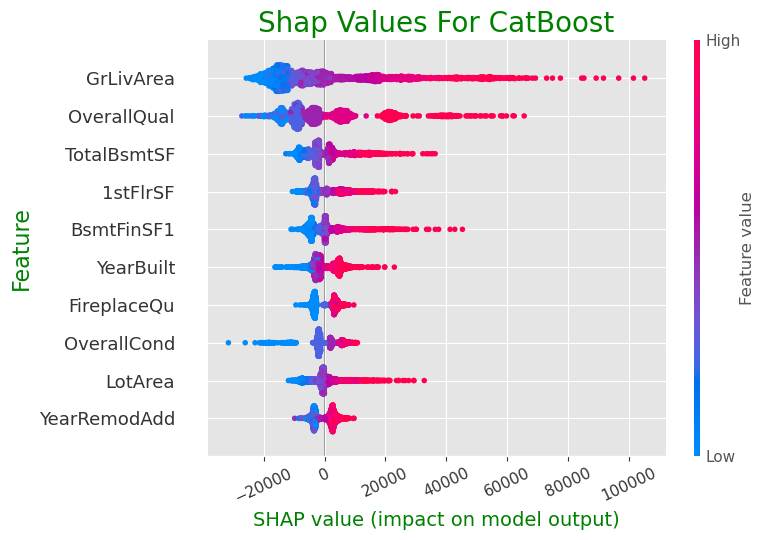

In [13]:
#Shap Global Summary Plot

plt.style.use('default')
plt.style.use('ggplot')

plt.figure(figsize=(8,4))


shap.summary_plot(shap_values, X, show=False, max_display=10)
plt.title('Shap Values For CatBoost', fontsize=20, color='Green')

plt.ylabel('Feature', fontsize=16, color='green')
plt.xlabel('SHAP value (impact on model output)', fontsize=14, color='green')
plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


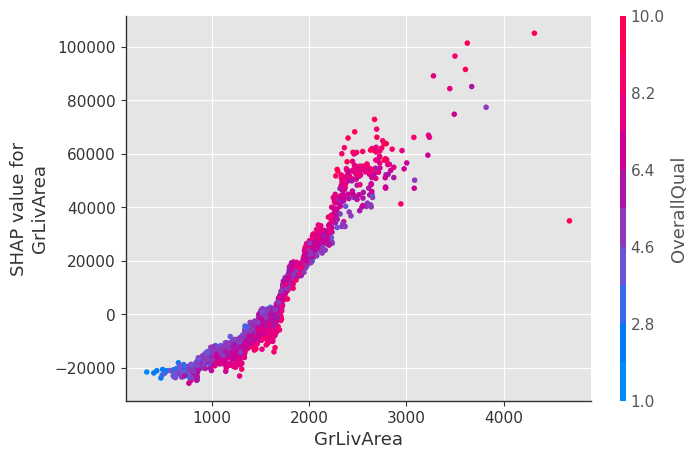

In [14]:
shap.dependence_plot("GrLivArea", shap_values, X)

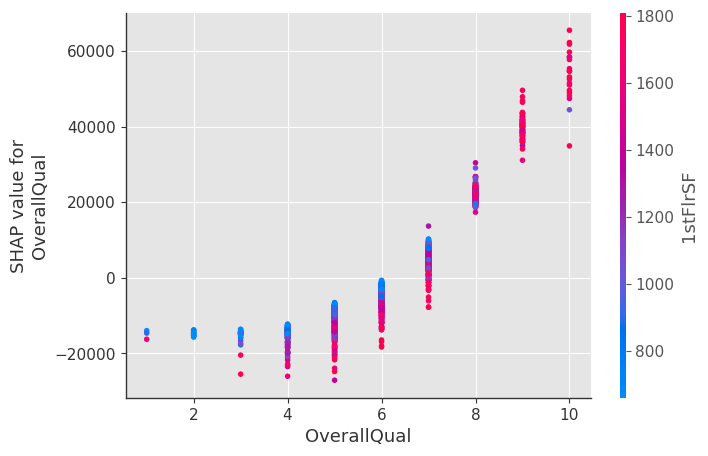

In [15]:
shap.dependence_plot("OverallQual", shap_values, X)

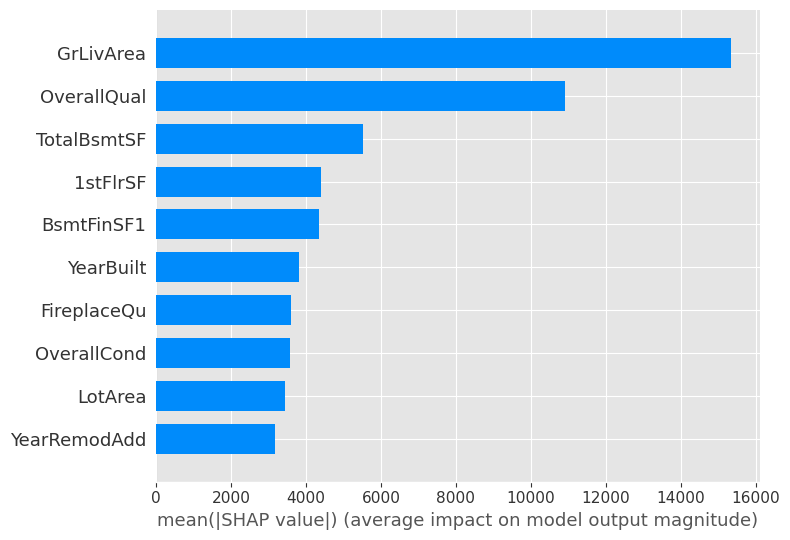

In [16]:
#Variable Importance Plot ~ Global Interpretability

plt.style.use('default')
plt.style.use('ggplot')

plt.figure(figsize=(8,4))

shap.summary_plot(shap_values, X, plot_type='bar', max_display=10, show=False)
#plt.title('CatBoost ~ Variable Importance Plot', color='blue', fontsize=20)

#plt.ylabel('Feature', fontsize=16, color='blue')
#plt.xlabel('Average (Marginal) US$ Impact On House Price', fontsize=14, color='blue')
#plt.title('CatBoost ~ Variable Importance Plot', fontsize=20, color='blue')


plt.tight_layout()
plt.show();